## Using twitter documentation


In [67]:
import os
from dotenv import load_dotenv
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np

In [2]:
load_dotenv()
ACCESS_TOKEN = os.getenv("ACCESS_TOKEN")
ACCESS_SECRET = os.getenv("ACCESS_SECRET")
CONSUMER_KEY = os.getenv("CONSUMER_KEY")
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET")

In [3]:
my_auth = requests_oauthlib.OAuth1(CONSUMER_KEY, CONSUMER_SECRET,ACCESS_TOKEN,
ACCESS_SECRET)

## Choose user

In [36]:
user = "britneyspears"

## 1. Get twitter mentions

In [37]:
def get_tweet_mentions(user, date):
    url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&until={date}'
    response = requests.get(url, auth=my_auth, stream=True)
    print(url, response)
    return response.json()

#should add count, result type: recent/popular

In [38]:
mentions = get_tweet_mentions(user, "2020-07-24")

https://api.twitter.com/1.1/search/tweets.json?q=%40britneyspears&count=100&tweet_mode=extended&until=2020-07-24 <Response [200]>


In [39]:
tweet_mentions = []
for i in range(len(mentions["statuses"])):
    try: 
        tweet_mentions.append(mentions["statuses"][i]['retweeted_status']['full_text'])
    except: 
        tweet_mentions.append(mentions["statuses"][i]["full_text"])

In [40]:
tweet_mentions

['¿Por qué no le hicieron caso desde Lucky?, por @JuanaMezcales\n\n"La mayoría de portadas que ha acaparado Britney en los últimos años se debe a su agitada vida sentimental".\n\n#ArteFuturaMX #freebritney #britney #BritneySpears @britneyspears #BritneyArmy\n\nhttps://t.co/SIPfDXjq39',
 'Queen @britneyspears by Steven Klein  (2001) 👸🏼\n\nMQ: https://t.co/YuAr1odA4Z https://t.co/qUbK1Ok4jN',
 '@ThePopTingz @britneyspears #endtheconservatorship',
 '@ThePopTingz @britneyspears If they don’t check on her she might not hear from her',
 'currently listening to pretty girls by @britneyspears and @IGGYAZALEA &amp; you HAVE to remember who WROTE this tune (MIXERS)',
 'AMOOOOO @britneyspears 💕 Tirei: 20 de 20 https://t.co/mw6JawZxNS',
 '#FreeBritney @britneyspears https://t.co/nNI4DxOi8V',
 'Ok the @britneyspears episode on Glee is by far my favvvvv',
 '“Check out our interview with @britneyspears airing this Monday!” https://t.co/DyxuTpn8k9 https://t.co/2JdM1J5IaT',
 'My first crush was @britne

In [41]:
# Retweets get cut with this code
"""tweet_mentions = []
for i in range(len(j["statuses"])):
    #count verified opinions x10
    
    if j["statuses"][i]["user"]["verified"]==False: 
        tweet_mentions.append(j["statuses"][i]["full_text"])
    elif j["statuses"][i]["user"]["verified"]==True: 
        tweet_mentions.extend([j["statuses"][i]["full_text"] for l in range(10)])"""

'tweet_mentions = []\nfor i in range(len(j["statuses"])):\n    #count verified opinions x10\n    \n    if j["statuses"][i]["user"]["verified"]==False: \n        tweet_mentions.append(j["statuses"][i]["full_text"])\n    elif j["statuses"][i]["user"]["verified"]==True: \n        tweet_mentions.extend([j["statuses"][i]["full_text"] for l in range(10)])'

Parameters:
lang ==> en
count ==> 100
until ==> (Returns tweets created before the given date. Date should be formatted as YYYY-MM-DD. Keep in mind that the search index has a 7-day limit. In other words, no tweets will be found for a date older than one week)

## 2. Get tweets from user

In [42]:
def get_tweets(user):
    url = f'https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name={user}&count=100&tweet_mode=extended'
    response = requests.get(url, auth=my_auth, stream=True)
    print(url, response)
    return response.json()

In [43]:
user_t = get_tweets(user)

https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=britneyspears&count=100&tweet_mode=extended <Response [200]>


In [45]:
id_ = []
retweet_count = []
followers_count = []
tweet = []
time = []
for i in range(len(user_t)):
    id_.append(user_t[i]["id_str"])
    retweet_count.append(user_t[i]["retweet_count"])
    followers_count.append(user_t[i]["user"]["followers_count"])
    time.append(user_t[i]['created_at'])
    try:
        tweet.append(user_t[i]['retweeted_status']['full_text'])
    except: 
        tweet.append(user_t[i]["full_text"])

In [46]:
d = {"id":id_, "time":time, "tweet": tweet, "retweets":retweet_count, "followers":followers_count}
data = pd.DataFrame(data = d)

In [47]:
data

,id,time,tweet,retweets,followers
0,1276677933848039424,Sat Jun 27 00:45:13 +0000 2020,OMG the #MoodRingRemixes are FLAWLESS! I loved...,278,55943976
1,1276677864717537286,Sat Jun 27 00:44:57 +0000 2020,Proud to welcome two new girls to the Britney ...,230,55943976
2,1276677788649611264,Sat Jun 27 00:44:38 +0000 2020,"She did that! @britneyspears' ""Mood Ring"" remi...",404,55943976
3,1276677688569344000,Sat Jun 27 00:44:15 +0000 2020,What a great ending to #PrideMonth! At midnigh...,183,55943976
4,1276604569229733888,Fri Jun 26 19:53:42 +0000 2020,Happy Pride Month ❤️💛💚💙💜 !!!!! Put on your dan...,2304,55943976
...,...,...,...,...,...
95,1054826643808755716,Tue Oct 23 20:07:24 +0000 2018,@VegasneyBitch Thank you so much! 💕,54,55943976
96,1054826084833869826,Tue Oct 23 20:05:11 +0000 2018,@britneys_diner Thank you! ❤️,19,55943976
97,1054825540723589120,Tue Oct 23 20:03:01 +0000 2018,@FaelFreitas ❤️❤️,32,55943976
98,1054824940732588033,Tue Oct 23 20:00:38 +0000 2018,@GlitterNStuds ❤️,16,55943976


In [48]:
"""
for i in range(len(user_t)):
    user_t[i]["user"]["followers_count"]
    user_t[i]["retweet_count"]
    

for i in range(len(user_t)):
    try:
        tweets[user_t[i]["id_str"]]= (user_t[i]['retweeted_status']['full_text'], user_t[i]['created_at'])
    except: 
        tweets[user_t[i]["id_str"]]= (user_t[i]["full_text"], user_t[0]['created_at'])
"""

'\nfor i in range(len(user_t)):\n    user_t[i]["user"]["followers_count"]\n    user_t[i]["retweet_count"]\n    \n\nfor i in range(len(user_t)):\n    try:\n        tweets[user_t[i]["id_str"]]= (user_t[i][\'retweeted_status\'][\'full_text\'], user_t[i][\'created_at\'])\n    except: \n        tweets[user_t[i]["id_str"]]= (user_t[i]["full_text"], user_t[0][\'created_at\'])\n'

## 3. Get replies for a tweet

In [89]:
def get_replies(user, tweet_id):
    url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&in_reply_to_status_id_str={tweet_id}'
    response = requests.get(url, auth=my_auth, stream=True)
    responses =  response.json()
    tweet_responses = []
    for i in range(len(responses["statuses"])):
        try: 
            tweet_responses.append(responses["statuses"][i]['retweeted_status']['full_text'])
        except: 
            tweet_responses.append(responses["statuses"][i]["full_text"])
    return tweet_responses

In [50]:
"""url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&in_reply_to_status_id_str=1286993270816378881'
response = requests.get(url, auth=my_auth, stream=True)
print(response.json())"""


"url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&in_reply_to_status_id_str=1286993270816378881'\nresponse = requests.get(url, auth=my_auth, stream=True)\nprint(response.json())"

## 4. Create data list

In [90]:
responses = []
for id_ in list(data["id"]):
    r = get_replies(user, id_)
    responses.append(r)

{'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}


KeyError: 'statuses'

In [ ]:
responses[0]

In [52]:
data

,id,time,tweet,retweets,followers,responses
0,1276677933848039424,Sat Jun 27 00:45:13 +0000 2020,OMG the #MoodRingRemixes are FLAWLESS! I loved...,278,55943976,[This opening to #OIDIA is pure 🔥 @britneyspea...
1,1276677864717537286,Sat Jun 27 00:44:57 +0000 2020,Proud to welcome two new girls to the Britney ...,230,55943976,[This opening to #OIDIA is pure 🔥 @britneyspea...
2,1276677788649611264,Sat Jun 27 00:44:38 +0000 2020,"She did that! @britneyspears' ""Mood Ring"" remi...",404,55943976,[This opening to #OIDIA is pure 🔥 @britneyspea...
3,1276677688569344000,Sat Jun 27 00:44:15 +0000 2020,What a great ending to #PrideMonth! At midnigh...,183,55943976,[This opening to #OIDIA is pure 🔥 @britneyspea...
4,1276604569229733888,Fri Jun 26 19:53:42 +0000 2020,Happy Pride Month ❤️💛💚💙💜 !!!!! Put on your dan...,2304,55943976,[This opening to #OIDIA is pure 🔥 @britneyspea...
...,...,...,...,...,...,...
95,1054826643808755716,Tue Oct 23 20:07:24 +0000 2018,@VegasneyBitch Thank you so much! 💕,54,55943976,[This opening to #OIDIA is pure 🔥 @britneyspea...
96,1054826084833869826,Tue Oct 23 20:05:11 +0000 2018,@britneys_diner Thank you! ❤️,19,55943976,[This opening to #OIDIA is pure 🔥 @britneyspea...
97,1054825540723589120,Tue Oct 23 20:03:01 +0000 2018,@FaelFreitas ❤️❤️,32,55943976,[This opening to #OIDIA is pure 🔥 @britneyspea...
98,1054824940732588033,Tue Oct 23 20:00:38 +0000 2018,@GlitterNStuds ❤️,16,55943976,[This opening to #OIDIA is pure 🔥 @britneyspea...


## 5. Extracting Vader Sentiment Analysis

In [53]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence): 
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

def sentiment_averages_vader(lst):
    l = []
    for e in lst: 
        l.append(sentiment_scores(e))
    return sum(l)/len(l)

In [76]:
sentiments = []
for i in range(len(data)):
    print(i)
    sentiments.append(sentiment_averages_vader(data["responses"][i]))
data["sentiments"]=sentiments

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## Extracting Topics From Hashtags

In [77]:
hashtags = []
for i in range(len(user_t)):
    h = []
    for t in range(len(user_t[i]["entities"]["hashtags"])):
        h.append(user_t[i]["entities"]["hashtags"][t]["text"])
    hashtags.append(h)

In [78]:
data["hashtags"] = hashtags

In [79]:
data.hashtags = data.hashtags.apply(lambda y: np.nan if len(y)==0 else y)

In [80]:
data.hashtags

0     [MoodRingRemixes, PRIDE2020]
1                [MoodRingRemixes]
2                              NaN
3           [PrideMonth, MoodRing]
4                              NaN
                  ...             
95                             NaN
96                             NaN
97                             NaN
98                             NaN
99                             NaN
Name: hashtags, Length: 100, dtype: object

In [23]:
"""from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords"""

In [24]:
"""def word_exctraction(lst):
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(lst) 
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
    all_words = df.sum().sort_values(ascending=[False]).to_dict()   
    stop_words = set(stopwords.words('english'))
    tokens_clean = {key: value for (key, value) in all_words.items() if key not in stop_words}
    return (tokens_clean)"""

In [25]:
"""topics = []
for i in range(len(data)):
    print(i)
    topics.append(word_exctraction(data[i]["tweet"]))"""

0


KeyError: 0

In [ ]:
# Creating dict with sentiments and time
"""times = []
for i in range(len(data)): 
    times.append(data[i]["time"])
zip_iterator = zip(sentiments, times)
sentiment_changes = dict(zip_iterator)"""

## Graphs

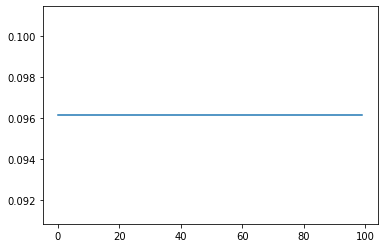

In [81]:
import matplotlib.pyplot as plt
plt.plot(data["sentiments"])

In [27]:
def clean_time(time):
    t = time.replace("+0000 ","")
    return t
data['time'] = data['time'].apply(clean_time)

In [28]:
"""import plotly.express as px
fig = px.line(df, y="sentiment", labels={'x':'sentiment', 'y':'time'}, text=df['time'])
# add hover_name="topic"


fig.show()"""

'import plotly.express as px\nfig = px.line(df, y="sentiment", labels={\'x\':\'sentiment\', \'y\':\'time\'}, text=df[\'time\'])\n# add hover_name="topic"\n\n\nfig.show()'

In [73]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(y=data['sentiments'],
                                mode='lines+markers',
                                #marker_color=df['sentiment'],
                                text=(data['time'], data['hashtags']))) # hover text goes here


fig.update_layout(title=f"Sentiment Analysis of {user}'s twitter interactions")
fig.show()

In [33]:
fig = go.Figure(data=go.Scatter(y=data['retweets'],
                                mode='lines+markers',
                                #marker_color=df['sentiment'],
                                text=data['time'])) # hover text goes here


fig.update_layout(title=f"Sentiment Analysis of {user}'s twitter interactions")
fig.show()

## Sentiment Change Prediction

In [ ]:
from statsmodels.tsa.stattools import ARMA
from statsmodels.tsa.ar_model import AR

In [ ]:
train

In [ ]:
train = sentiments[0:90]
test = sentiments[90:-1]

In [ ]:
model = AR(train)

In [ ]:
model_fit = model.fit(maxlag=10)
predictions = model_fit.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)

In [ ]:
predictions

In [ ]:
test